# Crawl Data

## CellPhone

In [ ]:
def get_data_element(browser):
    
    table = browser.find_element_by_xpath("//table[contains(@id,'tskt')]")
    # print("-----------------------------------------------------------")
    #Mo xem them
    try:
        browser.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div[2]/div[2]/div[3]/div[2]/div[1]/div[2]/a").click()
        browser.find_element_by_xpath("//a[contains(@id, 'more-specific')]").click()
    except Exception as err:
        # print(err)
        # print("no more-specific")
        pass
    #id
    
    #name
    name = browser.find_element_by_xpath("/html/body/div[1]/div/div[2]/div/div[2]/div[2]/div[1]/h1").get_attribute("innerText")
    #discount_price
    try:
        discount_price = browser.find_element_by_xpath("//p[contains(@class, 'special-price')]").find_element_by_xpath(".//span").get_attribute("innerText")
        discount_price = float(discount_price[:-1].replace(".", ""))
    except Exception as err:
        discount_price = None 
    #origin_price
    try:
        origin_price = browser.find_element_by_xpath("//p[contains(@class, 'old-price')]").find_element_by_xpath(".//span").get_attribute("innerText")
        origin_price = float(origin_price[:-1].replace(".", ""))
    except Exception as err:
        origin_price = None
    #discount_percent
    ram = None
    cpu = None
    screen_size = None
    resolution = None
    os_name = None
    list_attribute_tr = table.find_elements_by_xpath(".//tbody/tr")
    for attribute_tr in list_attribute_tr:
        #branch
        if attribute_tr.find_element_by_xpath(".//td[1]").get_attribute("innerText") == "Hãng sản xuất":
            branch = attribute_tr.find_element_by_xpath(".//td[2]").get_attribute("innerText")
        #screen_size
        if attribute_tr.find_element_by_xpath(".//td[1]").get_attribute("innerText") == "Kích thước màn hình":
            screen_size = attribute_tr.find_element_by_xpath(".//td[2]").get_attribute("innerText")
        #resolution
        if attribute_tr.find_element_by_xpath(".//td[1]").get_attribute("innerText") == "Độ phân giải màn hình":
            resolution = attribute_tr.find_element_by_xpath(".//td[2]").get_attribute("innerText")
        #OS_name
        if attribute_tr.find_element_by_xpath(".//td[1]").get_attribute("innerText") == "Phiên bản hệ điều hành":
            os_name = attribute_tr.find_element_by_xpath(".//td[2]").get_attribute("innerText")    
        #cpu
        if attribute_tr.find_element_by_xpath(".//td[1]").get_attribute("innerText") == "CPU":
            cpu = attribute_tr.find_element_by_xpath(".//td[2]").get_attribute("innerText")
        #ram
        if attribute_tr.find_element_by_xpath(".//td[1]").get_attribute("innerText") == "Bộ nhớ đệm / Ram":
            ram = attribute_tr.find_element_by_xpath(".//td[2]").get_attribute("innerText")
        # #pin
        # if attribute_tr.find_element_by_xpath(".//td[1]").get_attribute("innerText") == "Pin":
        #     pin = attribute_tr.find_element_by_xpath(".//td[2]").get_attribute("innerText")

    #star
    try:
        star = browser.find_element_by_xpath("//p[contains(@class, 'averageRatings')]").get_attribute("innerText")
        star = float(star)
    except Exception as err:
        star = None
    #count_comment
    try:
        count_comment = browser.find_element_by_xpath("//span[contains(@id, 'total_comment')]/b").get_attribute("innerText")
        count_comment = count_comment.replace("Hỏi và đáp ", "")
        count_comment = count_comment.replace("(", "")
        count_comment = count_comment.replace(" Bình luận)", "")
    except Exception as err:
        count_comment = None
    # print("-----------------------------------------------------------")

    return name, branch, discount_price, origin_price, screen_size, resolution, os_name, cpu, ram, star, count_comment

In [ ]:
from selenium import webdriver
from get_data_element import get_data_element
from time import sleep
import csv

browser_catagory = webdriver.Firefox(executable_path="./geckodriver")
browser_detail = webdriver.Firefox(executable_path="./geckodriver")

with open('./cellphone_phone_detail.csv', mode= 'w') as file:
    writer = csv.writer(file, delimiter = ',', quotechar='"', quoting = csv.QUOTE_MINIMAL)
    writer.writerow(['id', 'name', 'branch', 'discount_price', 'origin_price', 'screen_size', 'resolution', 'OS_name', 'cpu', 'ram', 'star', 'count_comment'])
    for j in range (1,11):
        browser_catagory.get("https://cellphones.com.vn/mobile.html?p=" + str(j))
        for i in range(1, 21):
            #get link of product
            product_link = browser_catagory.find_element_by_xpath("/html/body/div[1]/div/div[3]/div/div[1]/div[2]/div[5]/ul/li["+ str(i) +"]/div[1]/a")
            print(product_link.get_attribute("href"))
            browser_detail.get(product_link.get_attribute("href"))

            #get detail
            try:
                name, branch, discount_price, origin_price, screen_size, resolution, OS_name, cpu, ram, star, count_comment = get_data_element(browser_detail)
                id = browser_catagory.find_element_by_xpath("/html/body/div[1]/div/div[3]/div/div[1]/div[2]/div[5]/ul/li[" + str(i) +"]").get_attribute("data-id")
                writer.writerow([id, name, branch, discount_price, origin_price, screen_size, resolution, OS_name, cpu, ram, star, count_comment])
            except Exception as err:
                print(err)

            sleep(5)

browser_catagory.close()
browser_detail.close()

## Thegioididong

In [ ]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import csv
import atexit
import time
import sys

options = Options()
options.headless = True

driver = webdriver.Firefox(options=options)

phones_detail_file = open("./tgdd_phone_detail.csv", mode="w+")
phone_detail_writer = csv.writer(phones_detail_file,
                                 delimiter=",",
                                 quotechar='"',
                                 quoting=csv.QUOTE_MINIMAL)


def get_phone_detail(phone_url):
    print('get_phone_detail', phone_url)
    driver.get(phone_url)
    # full_parameter_ele = driver.find_elements_by_xpath("//div[contain(@class, 'fullparameter')]")
    # script_tags = driver.find_elements_by_xpath("//script[contains(@type, 'application/ld+json') and text()[contains(.,'Product')]]")
    # script_tags = driver.find_elements_by_xpath("//script[text()[contains(.,'\"@type\":\"Product\"')]]")

    price_area = driver.find_element_by_xpath(
        "//div[contains(@class, 'area_price')]")
    try:
        # price_area.find_element_by_xpath("//span[contains(@class, 'hisprice')]")
        discount_price = price_area.find_element_by_xpath(
            "//strong").get_attribute('innerText')
        origin_price = price_area.find_element_by_xpath(
            "//span[contains(@class, 'hisprice')]").get_attribute('innerText')
        discount_price = float(discount_price.replace('.', '')[:-1])
        origin_price = float(origin_price.replace('.', '')[:-1])
        discount_percent = float(
            (origin_price - discount_price) / origin_price)
    except Exception as err:
        discount_price = 0
        discount_percent = 0
        origin_price = price_area.find_element_by_xpath(
            "//strong").get_attribute('innerText')
        origin_price = float(origin_price.replace('.', '')[:-1])

    # price = driver.find_element_by_xpath("//div[contains(@class, 'area_price')]").get_attribute('innerText')
    try:
        screen_text = driver.find_element_by_xpath(
            "//li[contains(@class, 'g6459_79_77')]/div").get_attribute(
                'innerText')
        screen_size = float(screen_text.split(',')[1].replace('"', ''))
    except Exception as e:
        screen_size = -1

    try:
        OS_name = driver.find_element_by_xpath(
            "//li[contains(@class, 'g72')]/div").get_attribute('innerText')
    except Exception as e:
        OS_name = ''

    try:
        back_camera = driver.find_element_by_xpath(
            "//li[contains(@class, 'g27')]/div").get_attribute('innerText')
        back_camera_list = []
        for camera in back_camera.split(' MP')[:-1]:
            back_camera_list.append(camera.split(' ')[-1])
    except Exception as e:
        back_camera_list = []

    try:
        front_camera = driver.find_element_by_xpath(
            "//li[contains(@class, 'g29')]/div").get_attribute('innerText')
        front_camera_list = []
        for camera in front_camera.split(' MP')[:-1]:
            front_camera_list.append(camera.split(' ')[-1])
    except Exception as e:
        front_camera_list = []

    try:
        cpu = driver.find_element_by_xpath(
            "//li[contains(@class, 'g6059')]/div").get_attribute('innerText')
    except Exception as e:
        cpu = ""

    try:
        ram_text = driver.find_element_by_xpath(
            "//li[contains(@class, 'g50')]/div").get_attribute('innerText')
        ram = int(ram_text.split(' ')[0])
    except:
        ram = -1
    try:
        storage_text = driver.find_element_by_xpath(
            "//li[contains(@class, 'g49')]/div").get_attribute('innerText')
        storage = int(storage_text.split(' ')[0])
    except:
        storage = -1
    try:
        battery_text = driver.find_element_by_xpath(
            "//li[contains(@class, 'g84_10882')]/div").get_attribute(
                'innerText')
        battery_amount = float(battery_text.split(' ')[0])
        is_fast_charge = True if battery_text.find('có sạc nhanh') else False
    except:
        battery_amount = -1
        is_fast_charge = False

    try:
        ratingCmtEle = driver.find_element_by_xpath("//div[contains(@class, 'tltRt')]/h3")
        ratingAvg = float(ratingCmtEle.get_attribute('data-gpa'))
        reviewCount = int(ratingCmtEle.get_attribute('innerText').split(' ')[0])
    except:
        ratingAvg = None
        reviewCount = None

    try:
        totalCommentEle = driver.find_element_by_xpath("//span[contains(@class, 'totalcomment')]")
        totalCommentCount = int(totalCommentEle.get_attribute('innerText').split(' ')[0].replace('.',''))
    except:
        totalCommentCount = 0
        sys.exit()

    phone_data = {
        'discount_price': discount_price,
        'origin_price': origin_price,
        'discount_percent': discount_percent,
        'screen_size': screen_size,
        'OS_name': OS_name,
        'back_camera_list': back_camera_list,
        'front_camera_list': front_camera_list,
        'cpu': cpu,
        'ram': ram,
        'battery_amount': battery_amount,
        'is_fast_charge': is_fast_charge,
        'ratingAvg': ratingAvg,
        'reviewCount': reviewCount,
        'commentCount': totalCommentCount,
    }
    return phone_data


def main():
    with open("../data/tgdd_url.csv", mode="w+") as tgdd_url_file:
        phones_detail_file = open("../data/tgdd_phone_detail.csv", mode="w+")
        cols_name = [
            'id', 'name', 'brand', 'discount_price', 'origin_price', 'discount_percent',
            'screen_size', 'OS_name', 'back_camera_list', 'main_back_camera', 'back_camera_count', 'front_camera_list', 'main_front_camera', 'ratingAvg', 'reviewCount', 'commentCount',
            'front_camera_count', 'cpu', 'ram', 'battery_amount', 'is_fast_charge'
        ]
        phone_detail_writer = csv.DictWriter(phones_detail_file,
                                             fieldnames=cols_name)

        phone_detail_writer.writeheader()

        driver = webdriver.Firefox(options=options, )
#         use this line for crawl all
#         driver.get("https://www.thegioididong.com/dtdd#i:5")
#         for demo, only crawl small phones 
        driver.get("https://www.thegioididong.com/dtdd#i:1")
        phone_eles = driver.find_elements_by_xpath(
            "//li[contains(@class, 'item') or contains(@class, 'item feature')]"
        )

        for phone_ele in phone_eles:
            url = phone_ele.find_element_by_tag_name("a").get_attribute('href')
            phone_name = phone_ele.find_element_by_xpath(
                './/h3').get_attribute('innerText')
            phone_id = phone_ele.get_attribute('data-productid')
            phone_brand = phone_ele.find_element_by_xpath(".//input[contains(@class, 'spInfo')]").get_attribute('data-brand')
            phone_url_file_writer = csv.writer(tgdd_url_file,
                                               delimiter=",",
                                               quotechar='"',
                                               quoting=csv.QUOTE_MINIMAL)

            phone_url_file_writer.writerow([phone_name, url])
            print(f'{url} - {phone_name}')
            try:
                phone_data = get_phone_detail(url)
                phone_data['name'] = phone_name
                phone_data['id'] = phone_id
                phone_data['back_camera_count'] = len(phone_data['back_camera_list'])
                phone_data['main_back_camera'] = phone_data['back_camera_list'][0]
                phone_data['front_camera_count'] = len(phone_data['front_camera_list'])
                phone_data['main_front_camera'] = phone_data['front_camera_list'][0]
                phone_data['brand'] = phone_brand
                phone_detail_writer.writerow(phone_data)
                print(phone_data)
                print('\n-------------\n')
            except Exception as err:
                print(err)
            finally:
                time.sleep(4)
        phones_detail_file.close()

main()
print("start crawl")
driver.quit()

## Benchmark score

In [ ]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait

import csv
import atexit
import time
import sys

options = Options()
options.headless = True

driver = webdriver.Firefox(options=options)

phone_benchmark_file = open("./phone_benchmark.csv", mode="w+")
cols_name = ["name", "score"]
phone_benchmark_writer = csv.DictWriter(phone_benchmark_file,
                                    fieldnames=cols_name,
                                 delimiter=",",
                                 quotechar='"',
                                 quoting=csv.QUOTE_MINIMAL)
phone_benchmark_writer.writeheader()


def mainAnroid():
    driver.get("http://www.antutu.com/en/ranking/rank1.htm")
    rank_list = driver.find_elements_by_xpath("//ul[contains(@class, 'list-unstyled newrank-b')]")
    for rank in rank_list:
        spanTags = rank.find_elements_by_xpath(".//li/span")
        for tag in spanTags:
            driver.execute_script("""var element = arguments[0];
                        element.parentNode.removeChild(element);
                       """, tag)
        name = rank.find_element_by_xpath(".//li").text
        totalScore = rank.find_element_by_xpath(".//li[contains(@class, 'blast')]").get_attribute('innerText')
        print(name,totalScore)
        data = {
            'name': name,
            'score': totalScore
        }
        phone_benchmark_writer.writerow(data)

def mainIOS():
    driver.get("http://www.antutu.com/en/ranking/ios1.htm")
    rank_list = driver.find_elements_by_xpath("//ul[contains(@class, 'list-unstyled newrank-b')]")
    for rank in rank_list:
        spanTags = rank.find_elements_by_xpath(".//li/span")
        for tag in spanTags:
            driver.execute_script("""var element = arguments[0];
                        element.parentNode.removeChild(element);
                       """, tag)
        name = rank.find_element_by_xpath(".//li").text
        totalScore = rank.find_element_by_xpath(".//li[contains(@class, 'blast')]").get_attribute('innerText')
        print(name,totalScore)
        data = {
            'name': name,
            'score': totalScore
        }
        phone_benchmark_writer.writerow(data)

mainAnroid()
mainIOS()
driver.quit()

# Visualize Data

## CellPhone

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cell_df = pd.read_csv('./cellphone_phone_detail.csv')
cell_df.head()

id                                 name branch  discount_price  \
0  25864  iPhone 12 Pro Max Chính Hãng (VN/A)  Apple      33590000.0   
1  24746          iPhone 12 Chính Hãng (VN/A)  Apple      22500000.0   
2  16520           iPhone 11 Chính hãng(VN/A)  Apple      16690000.0   
3  16522   iPhone 11 Pro Max Chính hãng(VN/A)  Apple      28000000.0   
4  25863      iPhone 12 Pro Chính Hãng (VN/A)  Apple      30590000.0   

   origin_price screen_size          resolution OS_name        cpu   ram  \
0    33990000.0  6.7 inches  1284 x 2778 pixels  iOS 14  Hexa-core   NaN   
1    24990000.0  6.1 inches  1170 x 2532 pixels  iOS 14  Hexa-core   NaN   
2    20000000.0  6.1 inches    1792 x 828 pixel  iOS 13        NaN  4 GB   
3    29500000.0  6.5 inches  2688 x 1242 pixels  iOS 13        NaN  4 GB   
4    30990000.0  6.1 inches  1170 x 2532 pixels  iOS 14  Hexa-core   NaN   

   star  count_comment  
0   4.7          770.0  
1   4.8          387.0  
2   4.6         1347.0  
3   4.8          769.0  
4   4.6          353.0

### Top 10 phones which has the lowest star ratings and their number of comments

In [3]:
data_csv = cell_df[['name','star', 'count_comment']].values
data_csv = data_csv[:10]
data_csv = data_csv[np.argsort(data_csv[:, 1])]
print(type(data_csv))
for i in data_csv:
    print(i)

<class 'numpy.ndarray'>
['iPhone 12 Mini Chính hãng (VN/A)' 4.1 152.0]
['iPhone 11 Chính hãng(VN/A)' 4.6 1347.0]
['iPhone 12 Pro Chính Hãng (VN/A)' 4.6 353.0]
['iPhone 12 Pro Max Chính Hãng (VN/A)' 4.7 770.0]
['iPhone 12 Chính Hãng (VN/A)' 4.8 387.0]
['iPhone 11 Pro Max Chính hãng(VN/A)' 4.8 769.0]
['Apple iPhone XR 64GB Chính hãng(VN/A)' 4.9 573.0]
['iPhone 12 Pro Max 256GB Chính Hãng (VN/A)' 5.0 134.0]
['iPhone 11 128GB Chính hãng(VN/A)' 5.0 593.0]
['ASUS ROG Phone 3 Chính hãng' 5.0 303.0]


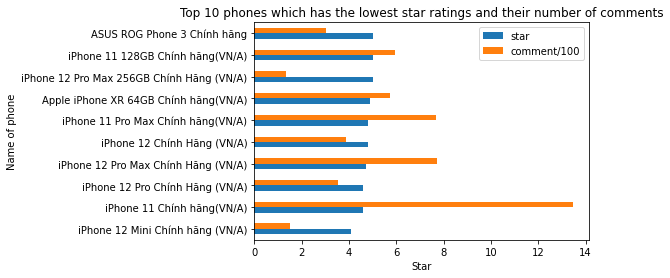

In [4]:
name = []
for i in range(0, len(data_csv)):
    name.append(data_csv[i,0])
star =[]
for i in range(0, len(data_csv)):
    star.append(data_csv[i,1])
comment =[]
for i in range(0, len(data_csv)):
    comment.append(data_csv[i,2]/100)
# fig, ax = plt.subplots()
# plt.xlabel('Star')
# plt.ylabel('Name of phone')
# plt.title('Top 10 of phone having lowest star')
# ax.barh(name, {star, comment}, align="center", color="skyblue")
df = pd.DataFrame({'star': star,
                   'comment/100': comment}, index=name)
ax = df.plot.barh(rot=0)
ax = plt.xlabel('Star')
ax = plt.ylabel('Name of phone')
ax = plt.title('Top 10 phones which has the lowest star ratings and their number of comments')

### Number phone group by star

Index(['3.7', '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0'],
      dtype='object', name='star')
star
3.7     1
3.8     1
3.9     1
4.0    12
4.1     1
4.2     1
4.3     7
4.4     2
4.5     6
4.6     8
4.7    11
4.8    12
4.9     7
5.0    50
Name: id, dtype: int64


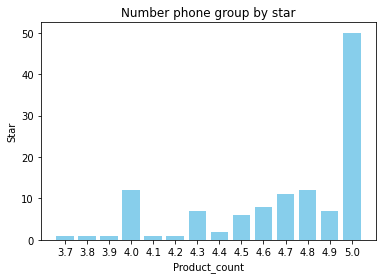

In [5]:
data_group_by_star = cell_df[['id','star']].groupby('star').count()['id']
data_group_by_star = data_group_by_star.drop(0.0)
star = data_group_by_star.index.astype('str')
product_count = data_group_by_star.values
print(star)
print(data_group_by_star)

fig, ax = plt.subplots()
ax.bar(star, product_count, align="center", color="skyblue")
plt.xlabel('Product_count')
plt.ylabel('Star')
plt.title('Number phone group by star')
plt.show()

### Average star rating of branch

branch
ASUS         2.880000
Apple        3.141379
BKAV         4.700000
Energizer    0.000000
Honor        0.000000
Huawei       2.473333
Masstel      0.000000
Nokia        2.166667
OPPO         2.738095
Pocophone    0.000000
Realme       2.381250
Samsung      3.207895
Vivo         2.181818
Vsmart       4.133333
Xiaomi       3.173077
Name: star, dtype: float64
Index(['ASUS', 'Apple', 'BKAV', 'Energizer', 'Honor', 'Huawei', 'Masstel',
       'Nokia', 'OPPO', 'Pocophone', 'Realme', 'Samsung', 'Vivo', 'Vsmart',
       'Xiaomi'],
      dtype='object', name='branch')


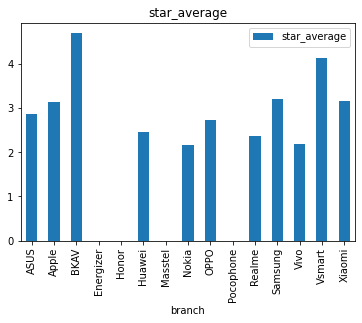

In [6]:
data_group_by_branch = cell_df[['branch','star']].groupby('branch').mean()['star']
print(data_group_by_branch)

branch = data_group_by_branch.index
star_average = data_group_by_branch.values
print(branch)
# print(star_average)
df = pd.DataFrame( {'star_average' : star_average}, index= branch)
lines = df.plot.bar(subplots = True)

## Thegioididong

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
tgdd_df = pd.read_csv('./tgdd_phone_detail.csv')
tgdd_df.head()

id                            name           brand  discount_price  \
0  225380             iPhone 12 mini 64GB  iPhone (Apple)             0.0   
1  220654                        OPPO A92            OPPO       5990000.0   
2  213031                  iPhone 12 64GB  iPhone (Apple)             0.0   
3  217308       Xiaomi Redmi 9 (4GB/64GB)          Xiaomi       3190000.0   
4  232364  Samsung Galaxy A12 (6GB/128GB)         Samsung             0.0   

   origin_price  discount_percent  screen_size     OS_name  \
0    19290000.0          0.000000         5.40      iOS 14   
1     6490000.0          0.077042         6.50  Android 10   
2    22990000.0          0.000000         6.10      iOS 14   
3     3990000.0          0.200501         6.53  Android 10   
4     4290000.0          0.000000         6.50  Android 10   

        back_camera_list  main_back_camera  ...  front_camera_list  \
0                 ['12']                12  ...             ['12']   
1  ['48', '8', '2', '2']                48  ...             ['16']   
2                 ['12']                12  ...             ['12']   
3  ['13', '8', '5', '2']                13  ...              ['8']   
4  ['48', '5', '2', '2']                48  ...              ['8']   

  main_front_camera  ratingAvg  reviewCount  commentCount  front_camera_count  \
0                12        4.0            3           259                   1   
1                16        3.2          193             0                   1   
2                12        5.0            3           465                   1   
3                 8        4.2          228             0                   1   
4                 8        0.0            7           104                   1   

                         cpu ram  battery_amount  is_fast_charge  
0    Apple A14 Bionic 6 nhân   4          2227.0            True  
1      Snapdragon 665 8 nhân   8          5000.0            True  
2    Apple A14 Bionic 6 nhân   4          2815.0            True  
3  MediaTek Helio G80 8 nhân   4          5020.0            True  
4  MediaTek Helio G35 8 nhân   6          5000.0            True  

[5 rows x 21 columns]

### Phone per brand

In [9]:
# number of brand
brands = pd.unique(tgdd_df['brand'])
brands_groupby = tgdd_df.groupby('brand').count()['id']

brand_names = brands_groupby.index
brand_counts = brands_groupby.values

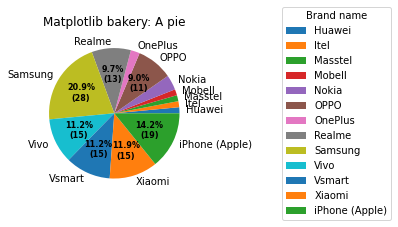

In [10]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    if absolute < 7:
        return ""
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(brand_counts, autopct=lambda pct: func(pct, brand_counts),
                                  labels=brand_names.values)

ax.legend(wedges, brand_names,
          title="Brand name",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

### Price distribute

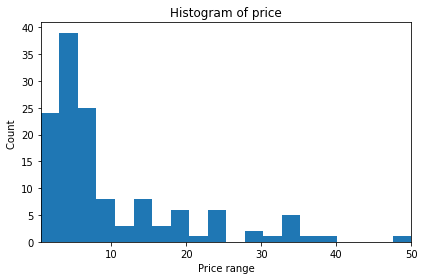

In [11]:
import matplotlib.pyplot as plt
tgdd_df = pd.read_csv('./tgdd_phone_detail.csv')

x = tgdd_df['origin_price'].values / 1000000
num_bins = 20

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins)


ax.set_xlabel('Price range')
ax.set_ylabel('Count ')
ax.set_title(r'Histogram of price')
plt.xlim([min(x), max(x)])

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

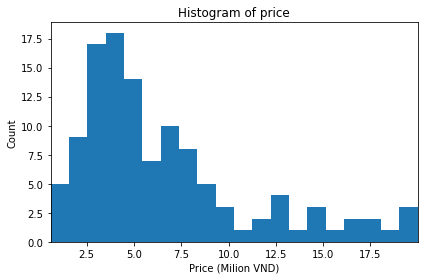

In [12]:
tgdd_df = pd.read_csv('./tgdd_phone_detail.csv')
x = tgdd_df['origin_price'].values / 1000000
# x = sorted(x)[:120]
x = x[x < 20]
num_bins = 20
# print(max(x), min(x))

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins)


ax.set_xlabel('Price (Milion VND)')
ax.set_ylabel('Count')
ax.set_title(r'Histogram of price')
plt.xlim([min(x), max(x)])

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### Average price of brand

In [13]:
tgdd_df = pd.read_csv('./tgdd_phone_detail.csv')
brands_avg_price_groupby = tgdd_df[['brand', 'origin_price']].groupby('brand').mean()['origin_price']

brand_names = brands_avg_price_groupby.index
brand_avg_price = brands_avg_price_groupby.values / 1000

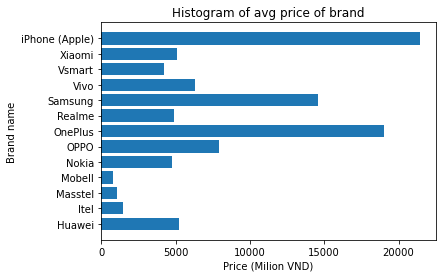

In [14]:
fig, ax = plt.subplots()
ax.barh(brand_names, brand_avg_price)
ax.set_xlabel('Price (Milion VND)')
ax.set_ylabel('Brand name')
ax.set_title(r'Histogram of avg price of brand')
plt.show()

### Number of phones of brand

Text(0.5, 1.0, 'Histogram of avg price of brand')

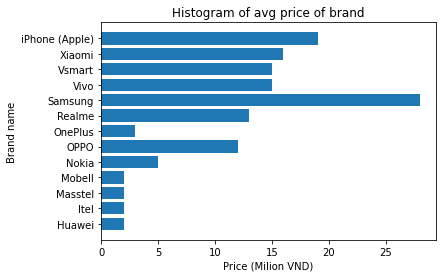

In [15]:
brands_products_groupby = tgdd_df[['brand', 'id']].groupby('brand').count()['id']

brand_names = brands_products_groupby.index
product_count = brands_products_groupby.values

fig, ax = plt.subplots()
ax.barh(brand_names, product_count)
ax.set_xlabel('Price (Milion VND)')
ax.set_ylabel('Brand name')
ax.set_title(r'Histogram of avg price of brand')

# Mapping data

## Mapping function

In [18]:
import pandas as pd
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

tgdd_df = pd.read_csv('./tgdd_phone_detail.csv')
cell_df = pd.read_csv('./cellphone_phone_detail.csv')

combine_df = pd.DataFrame()
for tgdd_row in tgdd_df.iterrows():
    data = tgdd_row[1].to_dict()
    tgdd_name = data['name']
    func = lambda cell_name : similar(tgdd_name.lower(), cell_name.lower().replace('chính hãng', '').replace('(vn/a)', ''))
    similar_df = cell_df[['id', 'name', 'origin_price', 'discount_price']]
    similar_df['similar_score'] = cell_df['name'].apply(func)
    
    similar_df.sort_values('similar_score', ascending=False)
    most_similar = similar_df.sort_values('similar_score', ascending=False).iloc[0]
    
    if most_similar['similar_score'] > 0.7:
        data['cell_id'] = most_similar['id']
        data['cell_name'] = most_similar['name']
        data['cell_origin_price'] = most_similar['origin_price']
        data['cell_discount_price'] = most_similar['discount_price']
        data['cell_name'] = most_similar['name']
        
    else:
        data['cell_name'] = None
        data['cell_id'] = None
        data['cell_origin_price'] = None
        data['cell_discount_price'] = None
    
    combine_df = combine_df.append(data, ignore_index=True)
    
combine_df[['name', 'cell_name', 'origin_price', 'cell_origin_price', 'discount_price', 'cell_discount_price']]

name                               cell_name  \
0               iPhone 12 mini 64GB  iPhone 12 Mini 256GB Chính hãng (VN/A)   
1                          OPPO A92                                Oppo A92   
2                    iPhone 12 64GB       iPhone 12 256GB Chính Hãng (VN/A)   
3         Xiaomi Redmi 9 (4GB/64GB)           Xiaomi Redmi 9 4G(4GB - 64GB)   
4    Samsung Galaxy A12 (6GB/128GB)                      Samsung Galaxy A11   
..                              ...                                     ...   
129            Masstel HAPI 10 Fami                                    None   
130                 Itel Alpha Lite                                    None   
131                 Masstel X5 Fami                                    None   
132                      Mobell P41                                    None   
133                      Mobell S41                                    None   

     origin_price cell_origin_price  discount_price cell_discount_price  
0      19290000.0         2.599e+07             0.0            2.28e+07  
1       6490000.0          6.49e+06       5990000.0            5.99e+06  
2      22990000.0         2.899e+07             0.0            2.55e+07  
3       3990000.0          3.99e+06       3190000.0             3.5e+06  
4       4290000.0          3.69e+06             0.0             3.6e+06  
..            ...               ...             ...                 ...  
129     1190000.0              None       1070000.0                None  
130      990000.0              None        790000.0                None  
131      990000.0              None        890000.0                None  
132      990000.0              None             0.0                None  
133      590000.0              None             0.0                None  

[134 rows x 6 columns]

In [19]:
combine_df[['name', 'cell_name', 'origin_price', 'cell_origin_price', 'discount_price', 'cell_discount_price']].dropna()

name                               cell_name  \
0               iPhone 12 mini 64GB  iPhone 12 Mini 256GB Chính hãng (VN/A)   
1                          OPPO A92                                Oppo A92   
2                    iPhone 12 64GB       iPhone 12 256GB Chính Hãng (VN/A)   
3         Xiaomi Redmi 9 (4GB/64GB)           Xiaomi Redmi 9 4G(4GB - 64GB)   
4    Samsung Galaxy A12 (6GB/128GB)                      Samsung Galaxy A11   
..                              ...                                     ...   
123        Vsmart Star 4 (2GB/32GB)                       Vsmart Star 4 2GB   
124        Vsmart Star 4 (2GB/16GB)                       Vsmart Star 4 2GB   
126                 Xiaomi Redmi 9A                         Xiaomi Redmi 9A   
127                        Nokia C2                                Nokia C2   
128                    Vsmart Bee 3                            Vsmart Bee 3   

     origin_price cell_origin_price  discount_price cell_discount_price  
0      19290000.0         2.599e+07             0.0            2.28e+07  
1       6490000.0          6.49e+06       5990000.0            5.99e+06  
2      22990000.0         2.899e+07             0.0            2.55e+07  
3       3990000.0          3.99e+06       3190000.0             3.5e+06  
4       4290000.0          3.69e+06             0.0             3.6e+06  
..            ...               ...             ...                 ...  
123     2290000.0          2.05e+06             0.0            1.85e+06  
124     2050000.0          2.05e+06             0.0            1.85e+06  
126     1990000.0          1.99e+06             0.0             1.9e+06  
127     1690000.0          1.69e+06             0.0            1.59e+06  
128     1590000.0          1.59e+06             0.0            1.49e+06  

[104 rows x 6 columns]

## Visualize correlation of price data

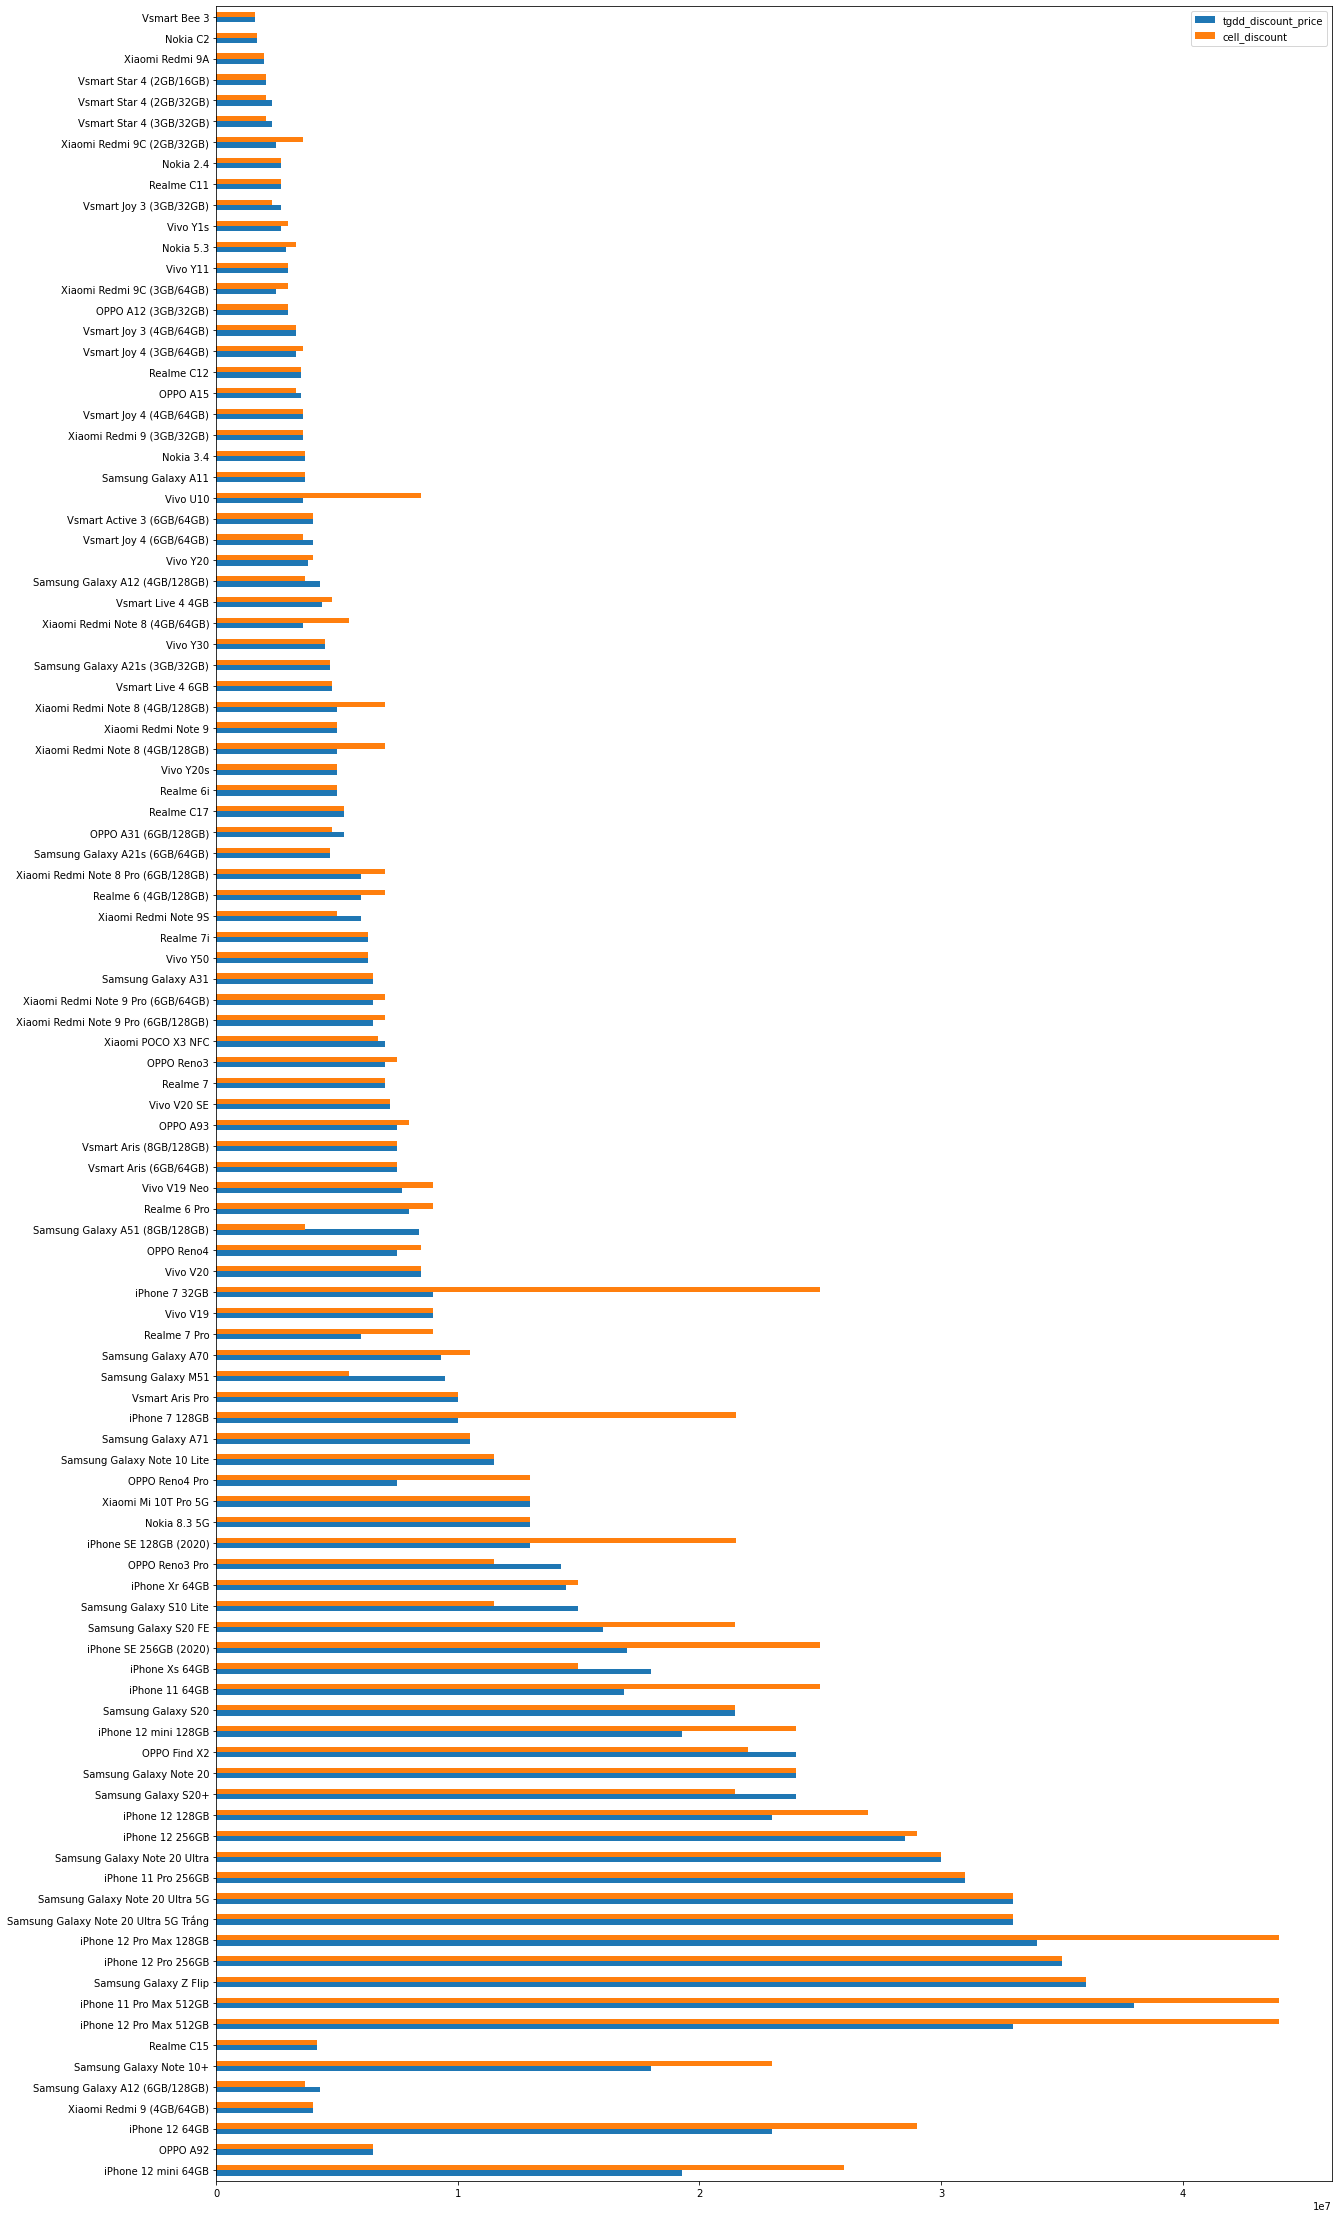

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_map = combine_df[['name', 'cell_name', 'origin_price', 'cell_origin_price', 'discount_price', 'cell_discount_price']].dropna().values
name = []
for i in range(0, len(data_map)):
    name.append(data_map[i,0])
tgdd_discount_price = []
for i in range(0, len(data_map)):
    tgdd_discount_price.append(data_map[i,2])
cell_discount_price = []
for i in range(0, len(data_map)):
    cell_discount_price.append(data_map[i,3])
#diagram
df = pd.DataFrame({'tgdd_discount_price': tgdd_discount_price,
                   'cell_discount': cell_discount_price}, index=name)
ax = plt.rcParams["figure.figsize"] = (20,40)
ax = df.plot.barh(rot=0)

## Performance benchmark

In [2]:
import pandas as pd
from difflib import SequenceMatcher
import matplotlib.pyplot as plt

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

tgdd_df = pd.read_csv('./tgdd_phone_detail.csv')
benchmark_df = pd.read_csv('./phone_benchmark.csv')

combine_df = pd.DataFrame()
for tgdd_row in tgdd_df.iterrows():
    data = tgdd_row[1].to_dict()
    tgdd_name = data['name']
    func = lambda phone_name : similar(tgdd_name.lower(), phone_name.lower().replace('chính hãng', '').replace('(vn/a)', ''))
    similar_df = benchmark_df[['name', 'score']]
    similar_df['similar_score'] = benchmark_df['name'].apply(func)
    
    similar_df.sort_values('similar_score', ascending=False)
    most_similar = similar_df.sort_values('similar_score', ascending=False).iloc[0]
    if most_similar['similar_score'] > 0.6:
        data['benchmark_name'] = most_similar['name']
        data['score'] = most_similar['score']
        combine_df = combine_df.append(data, ignore_index=True)    
print("Number of phone after mapping", len(combine_df))

Number of phone after mapping 65


After mapping, we have 65 phone that belong to both website, so let see how performance reflect to the 

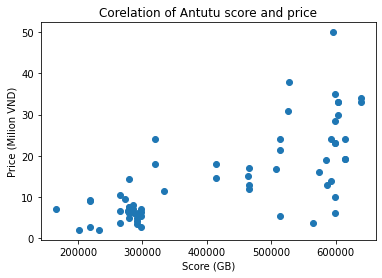

In [3]:
origin_price = combine_df['origin_price'].values / 1e6
score = combine_df['score'].values

fig, ax = plt.subplots()
ax.set_xlabel('Score (GB)')
ax.set_ylabel('Price (Milion VND)')
ax.set_title(r'Corelation of Antutu score and price')
ax.scatter(score, origin_price)
ax = plt.rcParams["figure.figsize"] = (6,4)
plt.show()

Let estimate the correlation between RAM and price. We use pearson algorithm

In [27]:
tgdd_df['origin_price'].corr( tgdd_df['ram'], method='pearson', min_periods=1)

0.5138119244123944

## Below are char of other variable with price

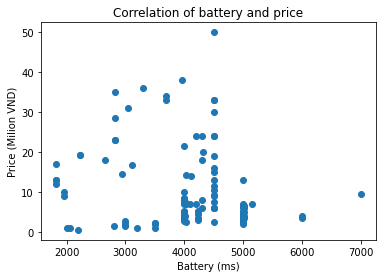

In [5]:
battery = tgdd_df['battery_amount'].values
origin_price = tgdd_df['origin_price'].values / 1e6

fig, ax = plt.subplots()
ax.scatter(battery, origin_price)
ax.set_xlabel('Battery (ms)')
ax.set_ylabel('Price (Milion VND)')
ax.set_title(r'Correlation of battery and price')

plt.show()

In [29]:
tgdd_df['origin_price'].corr( tgdd_df['battery_amount'], method='pearson', min_periods=1)

-0.2418662562099716

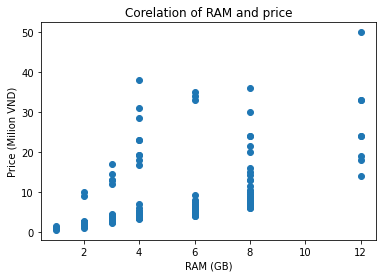

In [6]:
tgdd_df = pd.read_csv('./tgdd_phone_detail.csv')

origin_price = tgdd_df['origin_price'].values / 1e6
ram = tgdd_df['ram'].values

fig, ax = plt.subplots()
ax.set_xlabel('RAM (GB)')
ax.set_ylabel('Price (Milion VND)')
ax.set_title(r'Corelation of RAM and price')
ax.scatter(ram, origin_price)

plt.show()

Let estimate the correlation between RAM and price.
We use `Spearman` algorithm because we thinks RAM is likely `ordinal` variable

In [7]:
tgdd_df['origin_price'].corr( tgdd_df['ram'], method='spearman', min_periods=1)

0.693623009381121